In [1]:
import numpy as np
import pymc 
import math 
import matplotlib.pyplot as plt

%matplotlib inline

 [-----------------100%-----------------] 10000 of 10000 complete in 1.3 secPlotting s2
Plotting s3
Plotting sout12
Plotting sout23
Plotting sout13
Plotting s1
Plotting outcome13


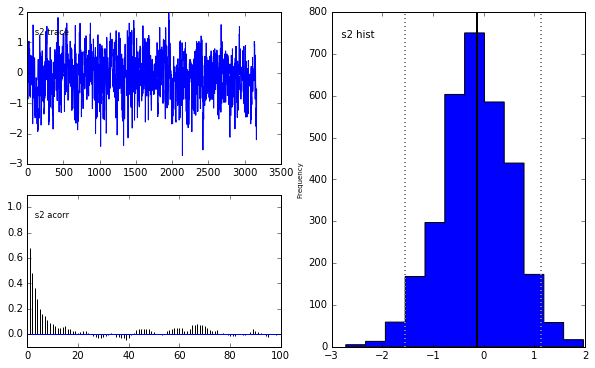

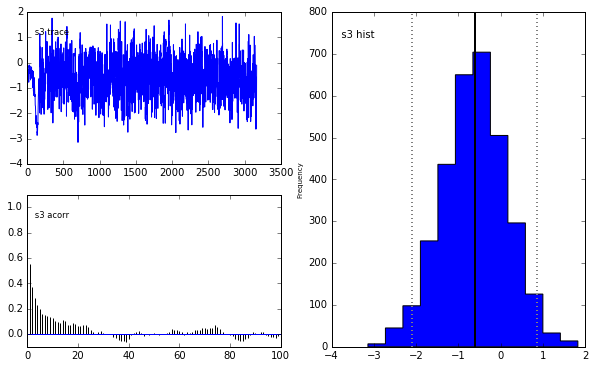

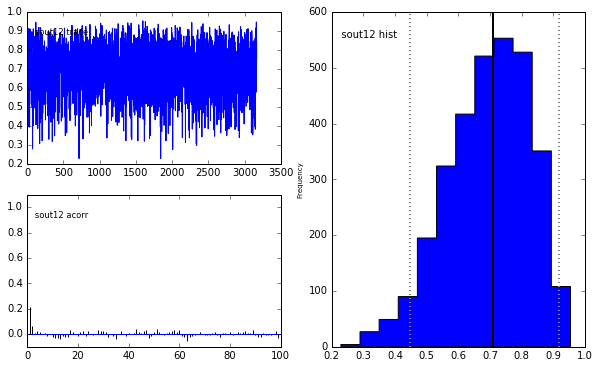

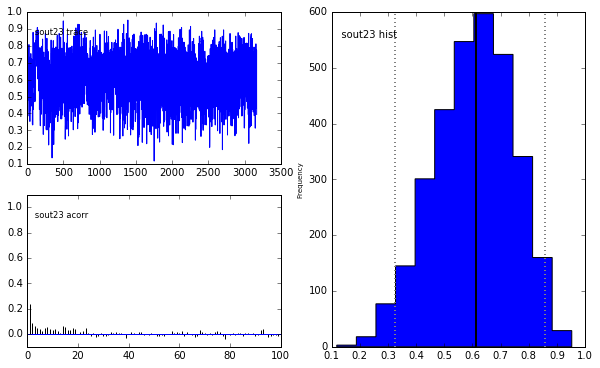

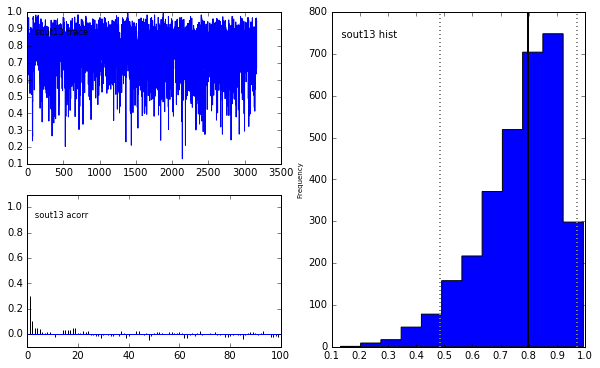

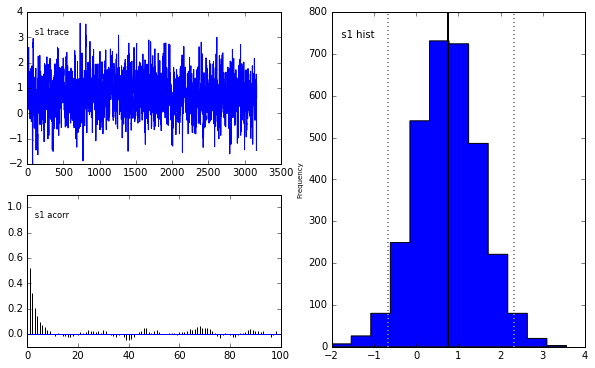

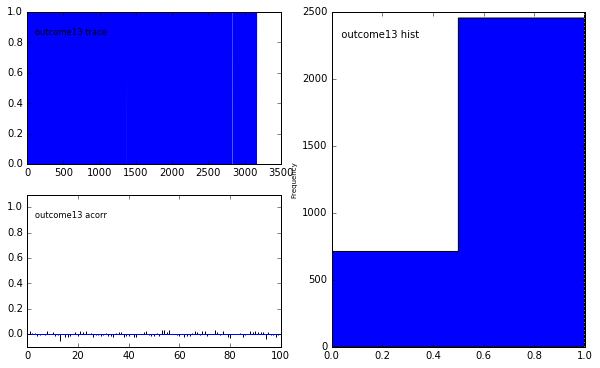

In [2]:

def model():
    s1 = pymc.Normal('s1', 0, 1.0)
    s2 = pymc.Normal('s2', 0, 1.0)
    s3 = pymc.Normal('s3', 0, 1.0)

    def logit(s1, s2):
        return 1.0 / (1 + math.exp(s2 - s1))

    @pymc.deterministic
    def sout12(s1= s1, s2 = s2):
        return 1.0 / (1 + math.exp(s2 - s1))

    @pymc.deterministic
    def sout23(s1= s2, s2 = s3):
        return 1.0 / (1 + math.exp(s2 - s1))

    @pymc.deterministic
    def sout13(s1= s1, s2 = s3):
        return 1.0 / (1 + math.exp(s2 - s1))
    
    toutcome12 = [1, 0, 0, 1, 1, 1, 1, 1, 1]
    toutcome23 = [1, 1, 0, 1, 0, 0, 1, 1, 1]
    
    outcome12 = pymc.Bernoulli('outcome12', sout12, value=toutcome12, observed=True)
    outcome23 = pymc.Bernoulli('outcome23', sout23, value=toutcome23, observed=True)
    outcome13 = pymc.Bernoulli('outcome13', sout13)
    
    return locals()

mcmc = pymc.MCMC(model())
mcmc.sample(iter=10000, burn=500, thin=3)
pymc.Matplot.plot(mcmc)

In [3]:
for i in range(1,4):
    print ("s%i: " %i, np.mean(mcmc.trace("s%i" %i)[:]))

s1:  0.747017269051
s2:  -0.152633703692
s3:  -0.617590352263


 [-----------------100%-----------------] 10000 of 10000 complete in 5.6 secPlotting outcome13
Plotting s3
Plotting s1
Plotting s2
Plotting outcome42
Plotting sout23
Plotting s4
Plotting sout12
Plotting sout13
Plotting sout14
Plotting sout34
Plotting sout42


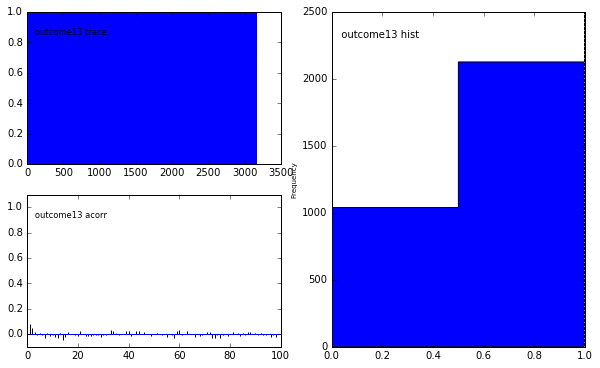

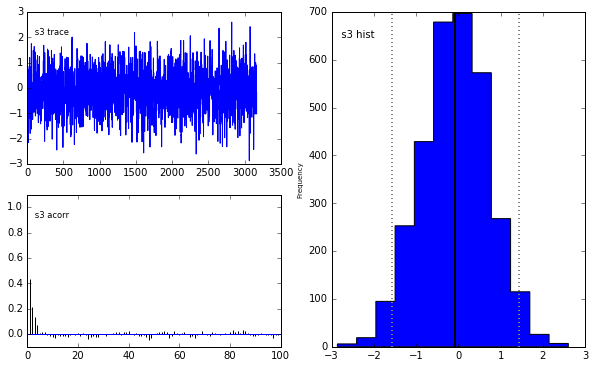

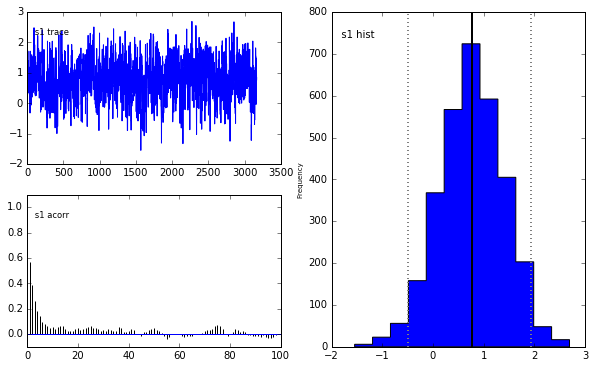

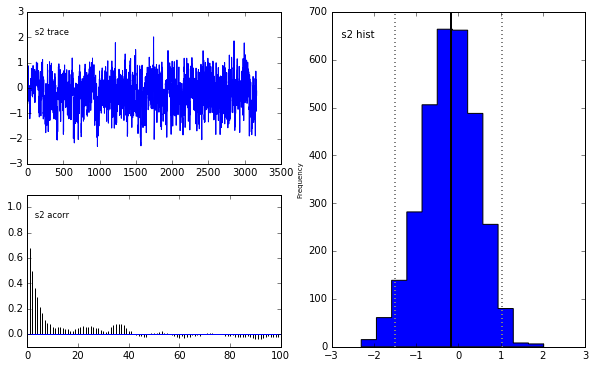

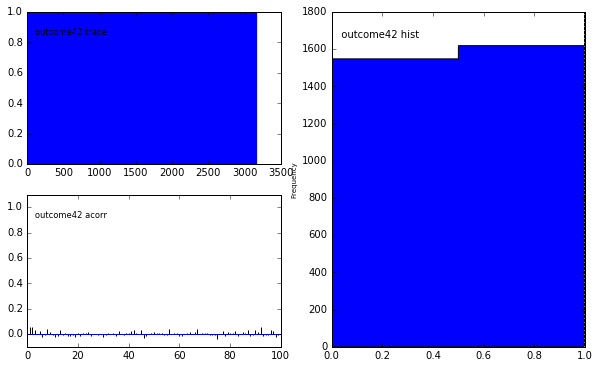

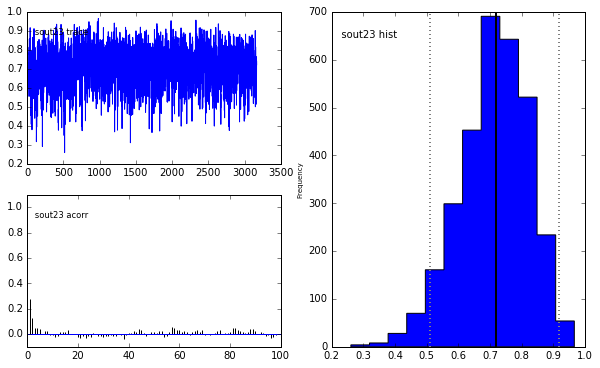

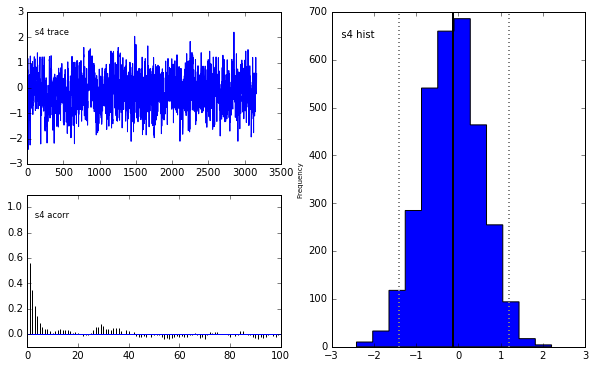

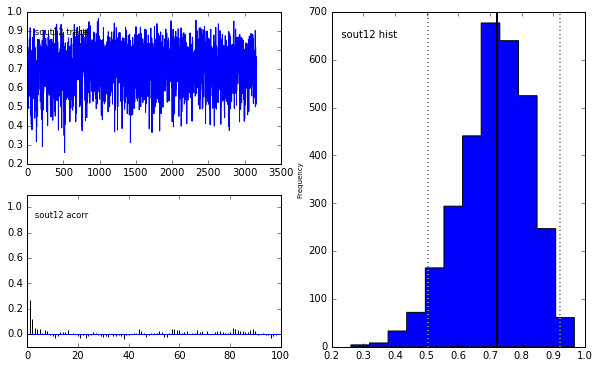

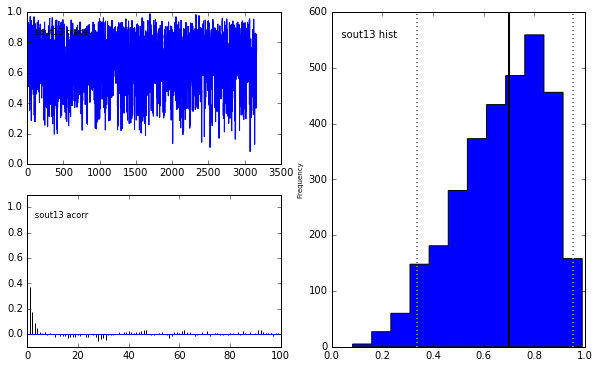

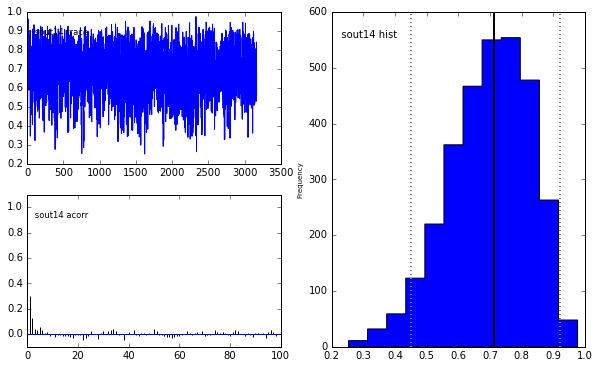

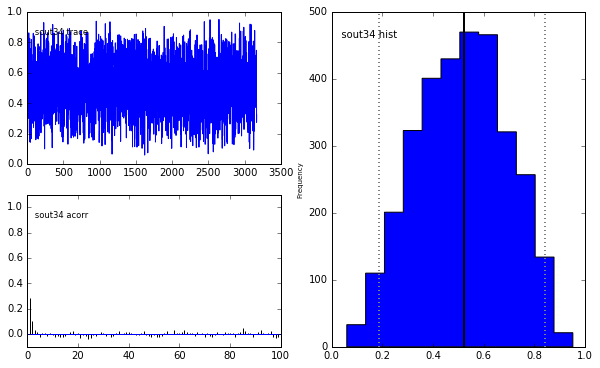

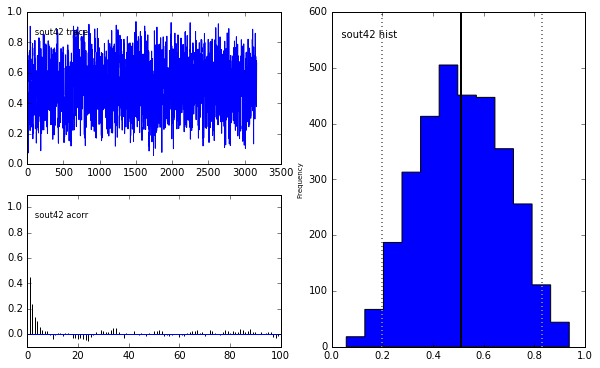

In [6]:
import pymc 
import math 
import matplotlib.pyplot as plt

%matplotlib inline

def model():
    s1 = pymc.Normal('s1', 0, 1.0)
    s2 = pymc.Normal('s2', 0, 1.0)
    s3 = pymc.Normal('s3', 0, 1.0)
    
    s4 = pymc.Normal('s4', 0, 1.0)

    def logit(s1, s2):
        return 1.0 / (1 + math.exp(s2 - s1))

    @pymc.deterministic
    def sout12(s1= s1, s2 = s2):
        return 1.0 / (1 + math.exp(s2 - s1))

    @pymc.deterministic
    def sout23(ss1= s2, ss2 = s3):
        return 1.0 / (1 + math.exp(s2 - s1))

    @pymc.deterministic
    def sout13(s1= s1, s2 = s3):
        return 1.0 / (1 + math.exp(s2 - s1))
    
    @pymc.deterministic
    def sout14(s1= s1, s2 = s4):
        return 1.0 / (1 + math.exp(s2 - s1))

    @pymc.deterministic
    def sout34(s1= s3, s2 = s4):
        return 1.0 / (1 + math.exp(s2 - s1))
    
    @pymc.deterministic
    def sout42(s1= s4, s2 = s2):
        return 1.0 / (1 + math.exp(s2 - s1))

    
    toutcome12 = [1, 0, 0, 1, 1, 1, 1, 1, 1]
    toutcome23 = [1, 1, 0, 1, 0, 0, 1, 1, 1]
    toutcome14 = [1,1, 1, 1 , 1, 0, 0]
    toutcome34 = [1, 1, 0, 0]

    outcome12 = pymc.Bernoulli('outcome12', sout12, value=toutcome12, observed=True)
    outcome23 = pymc.Bernoulli('outcome23', sout23, value=toutcome23, observed=True)
    outcome13 = pymc.Bernoulli('outcome13', sout13)
    
    outcome14 = pymc.Bernoulli('outcome14', sout14, value=toutcome14, observed=True)
    outcome34 = pymc.Bernoulli('outcome34', sout34, value=toutcome34, observed=True)
    outcome42 = pymc.Bernoulli('outcome42', sout42)
    
    return locals()

mcmc = pymc.MCMC(model())
mcmc.sample(iter=10000, burn=500, thin=3)
pymc.Matplot.plot(mcmc)

In [7]:
for i in range(1,5):
    print ("s%i: " %i, np.mean(mcmc.trace("s%i" %i)[:]))

s1:  0.763951299107
s2:  -0.211636967723
s3:  -0.0833987390731
s4:  -0.147133832109
